In [2]:
#import useful packages
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import rtree

#make sure python plots are embedded in the notebook
%matplotlib inline 

In [3]:
#read 311 data
df311 = pd.read_csv('ads_final_data/311.csv')
df311 = df311.dropna(subset=['latitude','longitude'])

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#create geodataframe based on longitude and latitude
gdf311 = gpd.GeoDataFrame(df311, geometry=gpd.points_from_xy(df311.longitude, df311.latitude))
gdf311.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,...,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),latitude,longitude,location,geometry
0,0,21722467,2011-10-24 08:58:00,2011-10-26 01:45:00,dep,department of environmental protection,noise,noise: construction before/after hours (nm1),NaN,10005,...,10/26/2011 01:45:00 AM,01 MANHATTAN,NaN,manhattan,981440.0,197131.0,40.707755,-74.010135,"(40.70775536877042, -74.01013530920267)",POINT (-74.01014 40.70776)
1,1,21722472,2011-10-24 16:45:00,2011-10-25 11:30:00,dep,department of environmental protection,noise,noise: jack hammering (nc2),NaN,10028,...,10/25/2011 11:30:00 AM,08 MANHATTAN,1.015490e+09,manhattan,997734.0,222619.0,40.777704,-73.951314,"(40.77770372685646, -73.95131385274287)",POINT (-73.95131 40.77770)
2,2,21722487,2011-10-24 11:19:00,2011-11-01 17:15:00,dep,department of environmental protection,noise,"noise, barking dog (nr5)",NaN,10026,...,11/01/2011 05:15:00 PM,10 MANHATTAN,1.019030e+09,manhattan,998231.0,232077.0,40.803663,-73.949500,"(40.80366261566248, -73.9494996673605)",POINT (-73.94950 40.80366)
3,3,21722492,2011-10-24 04:26:00,2011-10-27 15:46:00,dep,department of environmental protection,noise,"noise, barking dog (nr5)",NaN,10001,...,10/27/2011 03:46:00 PM,04 MANHATTAN,1.007530e+09,manhattan,985099.0,212659.0,40.750376,-73.996936,"(40.750376340381756, -73.99693580682785)",POINT (-73.99694 40.75038)
4,4,21722493,2011-10-24 04:45:00,2012-01-30 11:15:00,dep,department of environmental protection,noise,noise: construction before/after hours (nm1),NaN,11219,...,01/30/2012 11:15:00 AM,12 BROOKLYN,3.056530e+09,brooklyn,984468.0,171470.0,40.637322,-73.999215,"(40.637322127875585, -73.99921453191904)",POINT (-73.99921 40.63732)


In [5]:
#read shapefiles of NYC NTA
nta=gpd.read_file('ads_final_data/Neighborhood_Tabulation_Areas/geo_export_ed718acf-b0e6-41cf-ac5d-a027f7d41063.shp')
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820..."


In [6]:
#read demographics data by NTA
demo = pd.read_csv('ads_final_data/acsdemo08to12.csv').T
demo.columns = demo.iloc[0]
demo = demo[1:]
demo['NTA_code'] = [x[:4] for x in demo.index]
demo.head()

Parameter,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,...,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and Three or more races",TOTAL HOUSING UNITS,NTA_code
BK72 Williamsburg,32828,16820,16008,6163,3773,3620,3279,3064,3960,2416,...,773,0,30,0,15,184,22,162,8939,BK72
BK73 North Side-South Side,46070,22290,23780,3017,2480,2315,2361,4123,13445,7162,...,1360,64,2012,88,127,863,11,852,20944,BK73
BK76 Greenpoint,31522,15499,16023,937,878,914,879,2653,10463,4465,...,257,149,1577,0,186,561,46,515,17302,BK76
BK90 East Williamsburg,33155,15587,17568,1341,913,1342,1460,3038,9522,4605,...,2917,31,3917,0,123,256,28,228,15814,BK90
BK09 Brooklyn Heights-Cobble Hill,23498,11805,11693,1538,543,547,1109,1464,5809,4242,...,1250,33,1671,0,23,793,31,762,12735,BK09


In [63]:
pop = pd.DataFrame(demo['Total population'])
pop = pop.T[:1].T
pop

Parameter,Total population
BK72 Williamsburg,32828
BK73 North Side-South Side,46070
BK76 Greenpoint,31522
BK90 East Williamsburg,33155
BK09 Brooklyn Heights-Cobble Hill,23498
...,...
SI25 Oakwood-Oakwood Beach,22038
SI32 Rossville-Woodrow,19938
SI48 Arden Heights,24799
SI54 Great Kills,43427


In [61]:
pd.DataFrame(demo.NTA_code)

,NTA_code
BK72 Williamsburg,BK72
BK73 North Side-South Side,BK73
BK76 Greenpoint,BK76
BK90 East Williamsburg,BK90
BK09 Brooklyn Heights-Cobble Hill,BK09
...,...
SI25 Oakwood-Oakwood Beach,SI25
SI32 Rossville-Woodrow,SI32
SI48 Arden Heights,SI48
SI54 Great Kills,SI54


In [65]:
total_population = pd.DataFrame(demo.NTA_code)
total_population['Total_population'] = pop
total_population

,NTA_code,Total_population
BK72 Williamsburg,BK72,32828
BK73 North Side-South Side,BK73,46070
BK76 Greenpoint,BK76,31522
BK90 East Williamsburg,BK90,33155
BK09 Brooklyn Heights-Cobble Hill,BK09,23498
...,...,...
SI25 Oakwood-Oakwood Beach,SI25,22038
SI32 Rossville-Woodrow,SI32,19938
SI48 Arden Heights,SI48,24799
SI54 Great Kills,SI54,43427


In [66]:
total_population.to_csv('ads_final_data/Total_population.csv')

In [7]:
#read economy data by NTA
eco = pd.read_csv('ads_final_data/economy.csv').T
eco.columns = eco.iloc[0]
eco = eco[1:]
eco['NTA_code'] = [x[:4] for x in eco.index]
eco.head()

Parameters,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Civilian labor force,Females 16 years and over,In labor force,...,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,Not in labor force:,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,NTA_code
BK72_Williamsburg,"18,567","8,407","8,407","7,970",437,0,"10,160","8,407","9,338","3,256",...,302,30,291,107,"6,711","6,199","1,832","4,898",512,BK72
BK73_North_Side-South_Side,37813,27062,27035,25281,1754,27,10751,27035,19505,13178,...,1073,603,535,664,6922,5733,1917,4112,1189,BK73
BK76_Greenpoint,28667,21148,21138,19849,1289,10,7519,21138,14572,10055,...,614,452,192,635,4751,3443,2019,1598,1308,BK76
BK90_East_Williamsburg,29431,19727,19711,18002,1709,16,9704,19711,15972,9991,...,1051,473,609,588,5341,4181,1410,3090,1160,BK90
BK09_Brooklyn_Heights-Cobble_Hill,20750,14848,14848,14060,788,0,5902,14848,10401,7261,...,644,600,81,129,3521,3317,3073,472,204,BK09


In [8]:
#read housing data by NTA
housing = pd.read_csv('ads_final_data/housing.csv').T
housing.columns = housing.iloc[0]
housing = housing[1:]
housing['NTA_code'] = [x[:4] for x in housing.index]
housing.head()

Parameters,Total housing units,Occupied housing units,Vacant housing units,Total housing units,"1-unit, detached","1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,...,No rent paid,Occupied units paying rent (excl. units where GRAPI can't be computed),Less than 15.0 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 percent or more,Not computed,NTA_code
BK72_Williamsburg,"8,939","8,299",640,"8,939",319,338,748,"2,276",776,466,...,136,"6,952",886,376,399,678,625,"3,988",200,BK72
BK73_North_Side-South_Side,20944,19172,1772,20944,497,416,1247,3156,3991,2111,...,392,15842,2002,1841,2057,1654,1636,6652,464,BK73
BK76_Greenpoint,17302,15124,2178,17302,363,522,1997,4409,7816,1183,...,238,11691,1809,1480,1697,1432,1020,4253,574,BK76
BK90_East_Williamsburg,15814,14888,926,15814,339,647,1679,2673,4470,1062,...,140,12117,1437,1611,1789,1528,1094,4658,375,BK90
BK09_Brooklyn_Heights-Cobble_Hill,12735,11346,1389,12735,98,451,462,1155,1897,1541,...,171,6092,1264,961,984,840,253,1790,297,BK09


In [9]:
#read socio data by NTA
socio = pd.read_csv('ads_final_data/sociofactors.csv').T
socio.columns = socio.iloc[0]
socio = socio[1:]
socio['NTA_code'] = [x[:4] for x in socio.index]
socio.head()

Parameter,Total households,Family households (families),Household With own children under 18 years,Household Married-couple family,Household With own children under 18 years,"Household Male househldr, no wife present, family",Household With own children under 18 years,"Household Female househldr, no husband present, family",Household With own children under 18 years,Nonfamily households,...,Russian,Scotch-Irish,Scottish,Slovak,Subsaharan African,Swiss,Ukrainian,Welsh,West Indian (excluding Hispanic origin groups),NTA_code
BK72_Williamsburg,8299,6813,4855,5640,4170,389,218,784,467,1486,...,41,4,3,0,60,14,26,0,49,BK72
BK73_North_Side-South_Side,19172,8691,3628,5161,2294,876,350,2654,984,10481,...,582,184,366,59,9,79,223,153,384,BK73
BK76_Greenpoint,15124,6330,2124,4599,1647,567,122,1164,355,8794,...,546,153,313,143,37,106,185,260,104,BK76
BK90_East_Williamsburg,14888,6765,2460,3933,1238,645,130,2187,1092,8123,...,575,74,193,27,62,53,54,122,213,BK90
BK09_Brooklyn_Heights-Cobble_Hill,11346,4784,1736,4255,1570,250,52,279,114,6562,...,1467,128,452,29,94,141,123,84,407,BK09


In [10]:
#add the demographics columns to the geopandas dataframe
nta_demo = pd.merge(nta,demo,left_on='ntacode',right_on='NTA_code')
nta_demo.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,Total population,Male,...,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and Three or more races",TOTAL HOUSING UNITS,NTA_code
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",106203,54766,...,612,6,12978,0,143,231,22,209,30704,BK88
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",51509,24824,...,764,97,27903,0,146,851,59,792,18976,QN51
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",23070,12001,...,5910,0,1282,46,153,181,27,154,6954,QN27
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",21520,9675,...,13468,69,2766,102,860,907,231,676,6843,QN07
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",23845,11266,...,6911,0,839,0,183,503,0,503,8810,MN06


In [11]:
#add the economy columns to the geopandas dataframe
nta_eco = pd.merge(nta,eco,left_on='ntacode',right_on='NTA_code')
nta_eco.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,Population 16 years and over,In labor force,...,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,Not in labor force:,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,NTA_code
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",69634,38529,...,1855,694,1286,755,18563,15980,6574,10261,2583,BK88
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",44018,27357,...,1324,593,749,937,8499,5932,3006,3202,2567,QN51
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",18246,12520,...,652,231,428,485,3393,2106,725,1447,1287,QN27
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",17915,12313,...,958,523,482,649,2811,2210,1209,1138,601,QN07
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",19327,10953,...,641,206,442,379,5252,4260,993,3457,992,MN06


In [12]:
#add the housing columns to the geopandas dataframe
nta_housing = pd.merge(nta,housing,left_on='ntacode',right_on='NTA_code')
nta_housing.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,Total housing units,Occupied housing units,...,No rent paid,Occupied units paying rent (excl. units where GRAPI can't be computed),Less than 15.0 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 percent or more,Not computed,NTA_code
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",30704,28325,...,769,18440,1957,1288,1512,1242,1320,11121,1203,BK88
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",18976,17877,...,405,8895,812,1208,799,683,773,4620,949,QN51
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",6954,6264,...,171,3226,364,195,327,399,398,1543,206,QN27
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",6843,6273,...,64,2493,159,294,183,347,150,1360,175,QN07
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",8810,8130,...,261,7419,698,735,692,831,546,3917,472,MN06


In [13]:
#add the socio columns to the geopandas dataframe
nta_socio = pd.merge(nta,socio,left_on='ntacode',right_on='NTA_code')
nta_socio.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,Total households,Family households (families),...,Russian,Scotch-Irish,Scottish,Slovak,Subsaharan African,Swiss,Ukrainian,Welsh,West Indian (excluding Hispanic origin groups),NTA_code
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",28325,22238,...,2769,0,16,57,151,135,634,17,131,BK88
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",17877,13110,...,430,4,104,5,66,35,226,23,282,QN51
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",6264,4670,...,37,0,9,0,159,0,9,0,1909,QN27
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",6273,4873,...,8,2,13,0,1034,0,1,0,7113,QN07
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",8130,4668,...,134,0,19,0,995,28,0,17,924,MN06


In [14]:
gdf311 = gdf311.dropna(subset = ['latitude', 'longitude'])

In [ ]:
#spatial join(demographics)
gdf311.crs = nta_demo.crs
nta_demo311 = gpd.sjoin(gdf311, nta_demo, how="inner", op="intersects")
nta_demo311.head()

In [ ]:
#spatial join(economy)
gdf311.crs = nta_eco.crs
nta_eco311 = gpd.sjoin(gdf311, nta_eco, how="inner", op="intersects")
nta_eco311.head()

In [ ]:
#spatial join(housing)
gdf311.crs = nta_housing.crs
nta_housing311 = gpd.sjoin(gdf311, nta_housing, how="inner", op="intersects")
nta_housing311.head()

In [ ]:
#spatial join(socio)
gdf311.crs = nta_socio.crs
nta_socio311 = gpd.sjoin(gdf311, nta_socio, how="inner", op="intersects")
nta_socio311.head()

In [ ]:
#export to csv files
nta_demo311.to_csv('ads_final_data/nta_demo311.csv')
nta_eco311.to_csv('ads_final_data/nta_eco311.csv')
nta_housing311.to_csv('ads_final_data/nta_housing311.csv')
nta_socio311.to_csv('ads_final_data/nta_socio311.csv')

In [16]:
nta_demo311 = pd.read_csv('ads_final_data/nta_demo311.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
table = pd.pivot_table(nta_demo311, values=['unique_key'], index =['NTA_code'], aggfunc = len)
nta311 = pd.merge(nta,table,left_on='ntacode',right_index=True)
nta311.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,unique_key
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",3423
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",2915
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",2540
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",1361
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",7023


/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:489: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


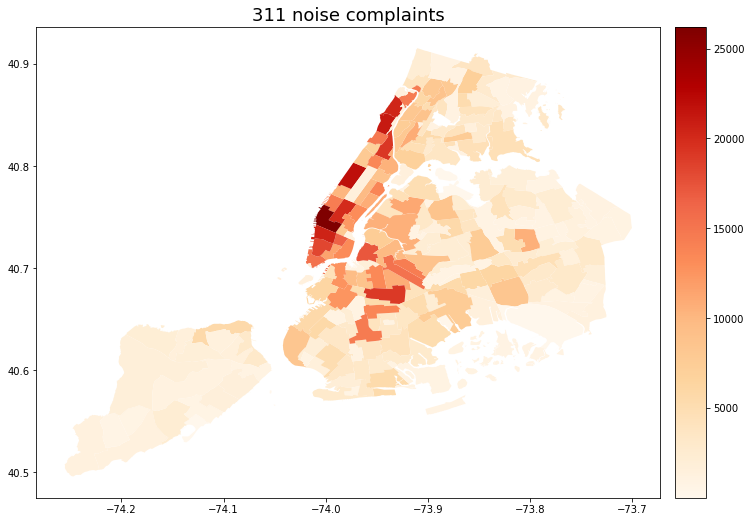

In [20]:
#now color the NTA zones based on the number of 311 noise complaints
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax.set_title("311 noise complaints", fontsize=18)
nta311.plot(axes=ax, column='unique_key', legend = True, cmap='OrRd',cax=cax)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:489: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


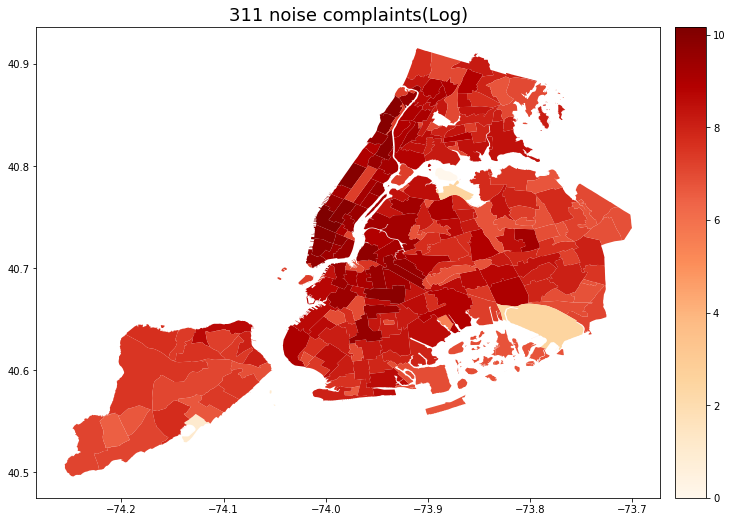

In [24]:
#as values vary widely try log-scale
import numpy as np

nta311['log_unique_key'] = np.log(nta311.unique_key)

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax.set_title("311 noise complaints(Log)", fontsize=18)
nta311.plot(axes=ax, column='log_unique_key', legend = True, cmap='OrRd',cax=cax)